In [14]:
%%writefile PIT.py
import math
import meep as mp
from meep import mpb

num_bands = 3

k_points = [mp.Vector3(0.0  ,0.5  ,0.5  ),
            mp.Vector3(0.0  ,0.625,0.375),       
            mp.Vector3(0.0  ,0.5  ,0.0  ),  
            mp.Vector3(0.0  ,0.0  ,0.0  ),
            mp.Vector3(0.0  ,0.5  ,0.5  ),
            mp.Vector3(0.25 ,0.75 ,0.5  ),
            mp.Vector3(0.375,0.75 ,0.375),
            mp.Vector3()]          

k_points = mp.interpolate(4, k_points)

geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1))

resolution = 32

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

print("Square lattice of rods: TE bands")
ms.run_te()

Overwriting PIT.py


In [22]:
!python PIT.py >& PI.out

In [23]:
!rm PI.dat
!grep tmfreqs PI.out >> PI.dat

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
num_bands=8
nip_raw = []
k_raw = []
omega_raw = []

with open('PI.dat') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_file)
    for row in csv_reader:
        nip_raw.append(row[1])
        k_raw.append(row[2:5])
        omega_raw.append(row[6:num_bands+6])
        

In [25]:
N=np.size(nip_raw)
nip=np.zeros((N))
k=np.zeros((N,3))
omega=np.zeros((N,num_bands))
for i in range(0,N):
    nip[i] = float(nip_raw[i])
    for j in range(0,3):
        k[i][j] = float(k_raw[i][j])
        
    for j in range(0,num_bands):
        omega[i][j] = float(omega_raw[i][j])

omega

array([[0.       , 0.546027 , 0.552094 , 0.552096 , 0.812093 , 0.854314 ,
        0.951107 , 1.08259  ],
       [0.0643671, 0.518896 , 0.552617 , 0.579095 , 0.812721 , 0.852958 ,
        0.941428 , 1.04995  ],
       [0.126061 , 0.48795  , 0.553991 , 0.610359 , 0.812384 , 0.849484 ,
        0.912816 , 1.02959  ],
       [0.181523 , 0.45665  , 0.555709 , 0.644685 , 0.802314 , 0.845326 ,
        0.880698 , 1.025    ],
       [0.224302 , 0.429317 , 0.557116 , 0.682524 , 0.772176 , 0.842059 ,
        0.865404 , 1.0269   ],
       [0.241821 , 0.417114 , 0.557658 , 0.713395 , 0.741311 , 0.84083  ,
        0.862516 , 1.02856  ],
       [0.245235 , 0.4236   , 0.551085 , 0.711571 , 0.749855 , 0.841982 ,
        0.862609 , 1.01714  ],
       [0.25442  , 0.441321 , 0.535034 , 0.706018 , 0.772267 , 0.845818 ,
        0.862861 , 0.989395 ],
       [0.266397 , 0.465222 , 0.516482 , 0.697068 , 0.802974 , 0.853388 ,
        0.863228 , 0.954203 ],
       [0.276774 , 0.48701  , 0.501823 , 0.687264 , 0.8

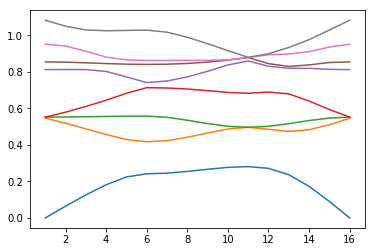

In [26]:
plt.plot(nip,omega[:,:])